In [ ]:
#===== Libraries =====
import cv2
import pytesseract
from matplotlib import pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename
import numpy as np


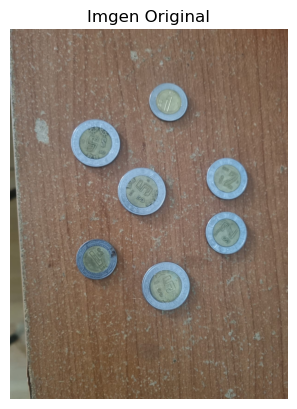

In [170]:
# ========== LOAD IMAGE ==========

Tk().withdraw()  
file_name = askopenfilename(title="Select an image file", filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp")])


imagen = cv2.imread(file_name)

imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)
plt.axis('off') 
plt.title("Imgen Original")
plt.show()


Monedas detectadas: 7
Valores detectados: [5, 5, 1, 2, 5, 2, 1]
Total en dinero: 21


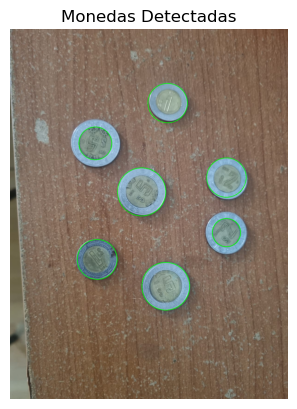

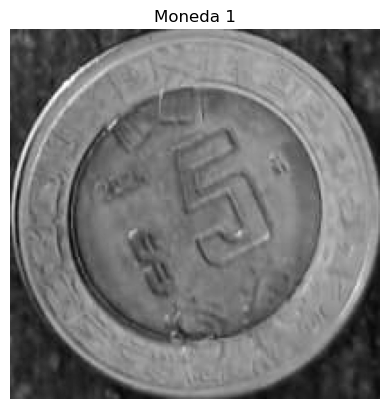

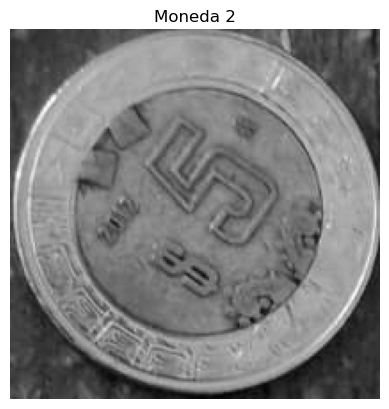

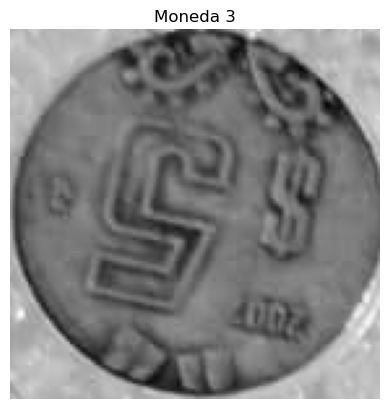

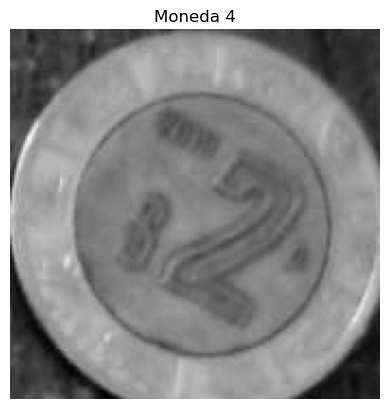

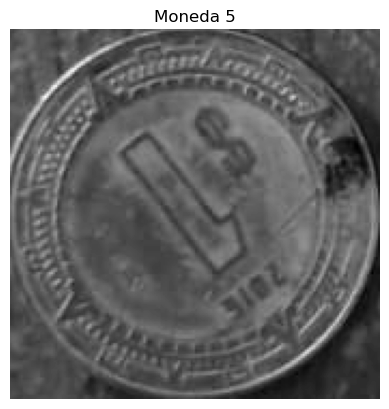

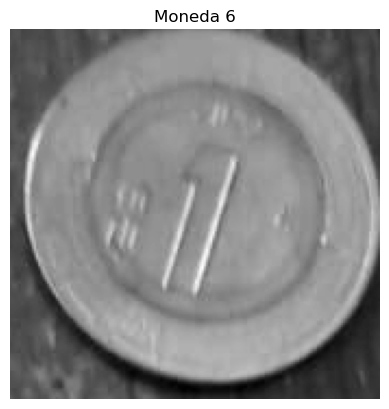

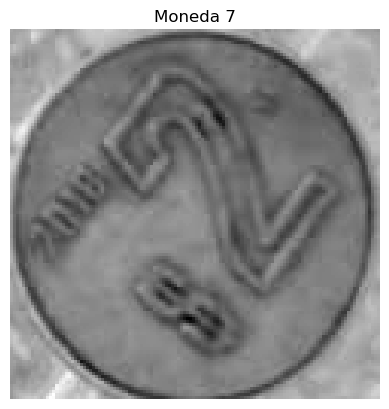

In [171]:
# ========== DETECT CIRCLES ==========

gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
gauss = cv2.GaussianBlur(gray, (9, 9), 2)

# Detectar circulos en la imagen
circles = cv2.HoughCircles(gauss, cv2.HOUGH_GRADIENT, dp=1, minDist=50,
                           param1=100, param2=30, minRadius=10, maxRadius=200) #retorna un array de circulos (x, y, r) donde x e y son las coordenadas del centro y r el radio

total_monedas = 0
valores_detectados = []

if circles is not None:
    circles = np.uint16(np.around(circles)) ## Convertir a enteros el array de circulos que retorna HoughCircles 
    total_monedas = len(circles[0, :]) # Total de monedas detectadas dependiendo de la cantidad de circulos detectados
    
    # Extraer radios y calcular percentiles para 3 grupos (1, 2 y 5 pesos)
    radios = [r for x, y, r in circles[0, :]] # Extraer radios de los circulos detectados con un for loop
    th1, th2 = np.percentile(radios, [33, 66]) 
    #si una moneda tiene un radio menor a th1 se considera de 1 peso, entre th1 y th2 de 2 pesos y mayor a th2 de 5 pesos
    
    for x, y, r in circles[0, :]: #dibujar circulos en la imagen original y decidir el valor de la moneda
        cv2.circle(imagen, (x, y), r, (0, 255, 0), 2) #dibuja circulos en x, y con radio r de color verde y grosor 2

        if r < th1: #si es menor al percentil 33 es 1 peso y así
            valor = 1
        elif r < th2:
            valor = 2
        else:
            valor = 5

        valores_detectados.append(valor)

# ===SHOW RESULTS===
print(f"Monedas detectadas: {total_monedas}")
print(f"Valores detectados: {valores_detectados}")
print(f"Total en dinero: {sum(valores_detectados)}")

# ========== SHOW IMAGES ==========
plt.imshow(imagen)
plt.axis('off')  
plt.title("Monedas Detectadas")
plt.show()

# ========== SHOW INDIVIDUAL COINS ==========
for i, (x, y, r) in enumerate(circles[0, :]): # Extraer cada moneda en el array de circulos
    x1, y1 = max(0, x - r), max(0, y - r) #condiciones para evitar que se salga de la imagen
    x2, y2 = x + r, y + r
    moneda = gray[y1:y2, x1:x2] # Extraer la moneda de la imagen original con las coordenadas x1, y1, x2, y2
    
    plt.imshow(moneda, cmap='gray')
    plt.axis('off')  
    plt.title(f"Moneda {i+1}")
    plt.show()

